# <font color=red>Analysis of Health Inspections Across Prince George's County </font>

### The objective of this analysis is to gain more understanding about restaurants, grocery stores etc and their overall heath hygiene. The analysis is conducted over the PG County and takes into account several big chains and restauarants. 

### This analysis gives us an overview of the number and type of violations that have taken across each restaurants. It will give us an insight into the overall quality of food served in our neighbourhood and whether the establishments take hygiene into consideration.

### *Our first step is Data Preparation and Cleansing*
#### *We will start our analysis with importing the data from Prince George's County Food inspection website*

In [223]:
#importing necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go

In [224]:
#importing the data and reading it
food_inspection = pd.read_csv("/Users/kritikapanjiar/Documents/Academics/Python/assignments/Food_Inspection.csv")
food_inspection.head()

Establishment_id                           Name           Category  \
0               952  MARTINI'S RESTAURANT & LOUNGE         Night Club   
1              2036                      MCDONALDS  Fast Food - Chain   
2              1450                         SUBWAY  Fast Food - Chain   
3              1633                  VOCELLI PIZZA  Fast Food - Chain   
4              1460                         SUBWAY  Fast Food - Chain   

          Inspection_date                   Inspection_results  \
0  03/19/2020 12:00:00 AM  Non-Compliant - Violations Observed   
1  02/14/2019 12:00:00 AM    Compliance Schedule - Outstanding   
2  03/20/2020 12:00:00 AM         Critical Violations observed   
3  03/19/2020 12:00:00 AM  Non-Compliant - Violations Observed   
4  10/30/2019 12:00:00 AM    Compliance Schedule - Outstanding   

              City State      Zip                  Address_line_1  \
0  FORT WASHINGTON    MD  20744.0                     725 CADY DR   
1  CAPITOL HEIGHTS    MD  20743.0  6131 MARTIN LUTHER KING JR HWY   
2    MITCHELLVILLE    MD  20716.0                  1344 CRAIN HWY   
3            BOWIE    MD  20720.0              4861 GLENN DALE RD   
4  CAPITOL HEIGHTS    MD  20743.0                 9141 ALAKING CT   

  Address_line_2  ... Proper_sewage_disposal No_bare_hand_contact  \
0         ------  ...          In Compliance        In Compliance   
1         ------  ...          In Compliance        In Compliance   
2         ------  ...          In Compliance        In Compliance   
3         ------  ...          In Compliance        In Compliance   
4            109  ...          In Compliance        In Compliance   

  Adequate_hand_washing_facilities Rodent_and_insects  \
0                    In Compliance      In Compliance   
1                    In Compliance      In Compliance   
2                    In Compliance      In Compliance   
3                    In Compliance      In Compliance   
4                    In Compliance      In Compliance   

  Food_contact_surfaces_and_equipment Inspection_type              Owner  \
0                       In Compliance   Re-inspection       JEDAKA HAYES   
1                   Out of Compliance      Monitoring        ISAAC GREEN   
2                       In Compliance  Food Complaint  ADEWALE SONIREGUN   
3                   Out of Compliance      Monitoring        RISHA VERMA   
4                       In Compliance   Comprehensive    ROKSHANA MANNAN   

                  Type                      Location Zip Codes  
0  Food Establishments  POINT (-76.996114 38.759579)   15572.0  
1  Food Establishments   POINT (-76.90064 38.901794)   15568.0  
2  Food Establishments   POINT (-76.71815 38.908236)   16438.0  
3  Food Establishments  POINT (-76.812885 38.954462)   16440.0  
4  Food Establishments  POINT (-76.848331 38.870336)   15568.0  

[5 rows x 30 columns]

Next we will try and understand the unique categories of establishments in our data set. 

In [225]:
#creating a table of unique categories
unique_categories = pd.DataFrame(food_inspection['Category'].unique())
unique_categories = unique_categories.rename(columns={0: "Categories"})
unique_categories


Categories
0                    Night Club
1             Fast Food - Chain
2             Convenience Store
3                     Carry-out
4                    Restaurant
5                        Bakery
6                   Coffee Shop
7             Fast Food - Local
8                 Grocery Store
9                     Fast Food
10                    Ice Cream
11                 Dollar Store
12            Bar/Tavern/Lounge
13           College/University
14       Stadium/Amusement Park
15                          NaN
16                 Full Service
17     Senior Nutrition Program
18          Meat/Poultry Market
19                 Private Club
20                        Hotel
21   Snack Bar/Concession Stand
22                Public School
23              Bakery/Catering
24            Gas Station Store
25         Health Care Facility
26               Private School
27              Limited Service
28                       Casino
29         Church/Temple/Mosque
30                Catering Only
31                    Cafeteria
32                   Group Home
33          Multiple Facilities
34            Pre-Packaged Only
35                         Deli
36          Fire/Community Hall
37        Banquet Hall/Ballroom
38                      Seafood
39                  Institution
40  After School Supper Program
41         Membership Warehouse
42        Full Service/Catering
43              Specialty Store
44                       Buffet
45                        Pizza
46        Grocery Store- Medium
47        Grocery Store - Large
48          Diet/Nutrition Site
49                Delivery Only
50                @Full Service
51                        Diner
52                        Donut
53              Farmer's Market
54                 Micro Market
55                     Excluded
56                        B & B
57                       School

We observe that some of the categories are not correct and do not represent a restaurant. Categories which do represent a restaurant would include places where customers can sit are served food / drinks exclusively . These categories inlcude :
Restaurant
Bakery
Coffee Shop
Fast Food - Local
Fast Food - Chain
Fast Food
Ice Cream
Deli
Buffet
Pizza
Diner

In [226]:
#creating a list of valid restaurants and creating a dummy variable using that list. 
restaurant_list = ['Restaurant','Diner','Bakery','Coffee Shop','Fast Food - Local','Fast Food - Chain','Fast Food','Ice Cream','Deli','Buffet','Pizza','Diner']
food_inspection['Restaurant_list'] = food_inspection['Category'].apply(lambda x: 1 if x in restaurant_list else 0)
food_inspection.head()


Establishment_id                           Name           Category  \
0               952  MARTINI'S RESTAURANT & LOUNGE         Night Club   
1              2036                      MCDONALDS  Fast Food - Chain   
2              1450                         SUBWAY  Fast Food - Chain   
3              1633                  VOCELLI PIZZA  Fast Food - Chain   
4              1460                         SUBWAY  Fast Food - Chain   

          Inspection_date                   Inspection_results  \
0  03/19/2020 12:00:00 AM  Non-Compliant - Violations Observed   
1  02/14/2019 12:00:00 AM    Compliance Schedule - Outstanding   
2  03/20/2020 12:00:00 AM         Critical Violations observed   
3  03/19/2020 12:00:00 AM  Non-Compliant - Violations Observed   
4  10/30/2019 12:00:00 AM    Compliance Schedule - Outstanding   

              City State      Zip                  Address_line_1  \
0  FORT WASHINGTON    MD  20744.0                     725 CADY DR   
1  CAPITOL HEIGHTS    MD  20743.0  6131 MARTIN LUTHER KING JR HWY   
2    MITCHELLVILLE    MD  20716.0                  1344 CRAIN HWY   
3            BOWIE    MD  20720.0              4861 GLENN DALE RD   
4  CAPITOL HEIGHTS    MD  20743.0                 9141 ALAKING CT   

  Address_line_2  ... No_bare_hand_contact Adequate_hand_washing_facilities  \
0         ------  ...        In Compliance                    In Compliance   
1         ------  ...        In Compliance                    In Compliance   
2         ------  ...        In Compliance                    In Compliance   
3         ------  ...        In Compliance                    In Compliance   
4            109  ...        In Compliance                    In Compliance   

  Rodent_and_insects Food_contact_surfaces_and_equipment Inspection_type  \
0      In Compliance                       In Compliance   Re-inspection   
1      In Compliance                   Out of Compliance      Monitoring   
2      In Compliance                       In Compliance  Food Complaint   
3      In Compliance                   Out of Compliance      Monitoring   
4      In Compliance                       In Compliance   Comprehensive   

               Owner                 Type                      Location  \
0       JEDAKA HAYES  Food Establishments  POINT (-76.996114 38.759579)   
1        ISAAC GREEN  Food Establishments   POINT (-76.90064 38.901794)   
2  ADEWALE SONIREGUN  Food Establishments   POINT (-76.71815 38.908236)   
3        RISHA VERMA  Food Establishments  POINT (-76.812885 38.954462)   
4    ROKSHANA MANNAN  Food Establishments  POINT (-76.848331 38.870336)   

  Zip Codes Restaurant_list  
0   15572.0               0  
1   15568.0               1  
2   16438.0               1  
3   16440.0               1  
4   15568.0               1  

[5 rows x 31 columns]

Next we will convert the Inspection date column into a datetime column so we can use it for better time analysis. 

In [227]:
#converting string into date time format. 
food_inspection['Inspection_date'] = pd.to_datetime(food_inspection['Inspection_date'])


We will now extract the year and month so we can use it for further analysis where we can track the data by year and months. 

In [228]:
#extracting year and month into new columns
food_inspection['Inspection_Year'] =  food_inspection['Inspection_date'].dt.year
food_inspection['Inspection_Month'] = food_inspection['Inspection_date'].dt.month
food_inspection['Inspection_Year_Month'] = food_inspection['Inspection_date'].dt.strftime('%Y-%m')
food_inspection


Establishment_id                           Name  \
0                   952  MARTINI'S RESTAURANT & LOUNGE   
1                  2036                      MCDONALDS   
2                  1450                         SUBWAY   
3                  1633                  VOCELLI PIZZA   
4                  1460                         SUBWAY   
...                 ...                            ...   
34731              1967   J&J INTERNATIONAL FOOD STORE   
34732              1712           BOWLERO COLLEGE PARK   
34733              1163                   POLLO FIESTA   
34734              2247            SEVEN ELEVEN 11663B   
34735                71                  METRO TANDOOR   

                         Category Inspection_date  \
0                      Night Club      2020-03-19   
1               Fast Food - Chain      2019-02-14   
2               Fast Food - Chain      2020-03-20   
3               Fast Food - Chain      2020-03-19   
4               Fast Food - Chain      2019-10-30   
...                           ...             ...   
34731               Grocery Store      2019-08-16   
34732  Snack Bar/Concession Stand      2019-08-16   
34733                Full Service      2019-08-21   
34734           Convenience Store      2019-08-19   
34735                         NaN      2019-08-20   

                        Inspection_results             City State      Zip  \
0      Non-Compliant - Violations Observed  FORT WASHINGTON    MD  20744.0   
1        Compliance Schedule - Outstanding  CAPITOL HEIGHTS    MD  20743.0   
2             Critical Violations observed    MITCHELLVILLE    MD  20716.0   
3      Non-Compliant - Violations Observed            BOWIE    MD  20720.0   
4        Compliance Schedule - Outstanding  CAPITOL HEIGHTS    MD  20743.0   
...                                    ...              ...   ...      ...   
34731  Non-Compliant - Violations Observed  LANHAM-SEABROOK    MD  20706.0   
34732                               ------     COLLEGE PARK    MD  20740.0   
34733         Critical Violations observed        RIVERDALE    MD  20737.0   
34734         Critical Violations observed    MOUNT RAINIER    MD  20712.0   
34735           Compliant - No Health Risk   NEW CARROLLTON    MD  20784.0   

                       Address_line_1 Address_line_2  ...  \
0                         725 CADY DR         ------  ...   
1      6131 MARTIN LUTHER KING JR HWY         ------  ...   
2                      1344 CRAIN HWY         ------  ...   
3                  4861 GLENN DALE RD         ------  ...   
4                     9141 ALAKING CT            109  ...   
...                               ...            ...  ...   
34731           9456 LANHAM SEVERN RD              A  ...   
34732              9021 BALTIMORE AVE         ------  ...   
34733             6408 KENILWORTH AVE         ------  ...   
34734                  2310 VARNUM ST         ------  ...   
34735               8500 ANNAPOLIS RD              E  ...   

      Food_contact_surfaces_and_equipment Inspection_type              Owner  \
0                           In Compliance   Re-inspection       JEDAKA HAYES   
1                       Out of Compliance      Monitoring        ISAAC GREEN   
2                           In Compliance  Food Complaint  ADEWALE SONIREGUN   
3                       Out of Compliance      Monitoring        RISHA VERMA   
4                           In Compliance   Comprehensive    ROKSHANA MANNAN   
...                                   ...             ...                ...   
34731                       In Compliance      Monitoring    CLEMENT IGBOKWE   
34732                       In Compliance   Re-inspection   SHIRLEY PIERPONT   
34733                       In Compliance   Re-inspection     Maria Villegas   
34734                   Out of Compliance      Monitoring       ABEBE TEFERA   
34735                       In Compliance   Re-inspection        JORGE PARRA   

                      Type                

Our next step is to try and analyse the type of compliances in the dataset. We can use this analysis to track the type of violations and the number of violartions in the dataset. 

In [229]:
#creating dummy variables of each compliance type column where 1 = if restaurant if our of compliance for a category. 
food_inspection['Food_from_approved_source'] = food_inspection['Food_from_approved_source'].apply(lambda x: 1 if x == 'Out of Compliance' else 0)
food_inspection['Food_protected_from_contamination'] = food_inspection['Food_protected_from_contamination'].apply(lambda x: 1 if x == 'Out of Compliance' else 0)
food_inspection['Ill_workers_restricted'] = food_inspection['Ill_workers_restricted'].apply(lambda x: 1 if x == 'Out of Compliance' else 0)
food_inspection['Proper_hand_washing'] = food_inspection['Proper_hand_washing'].apply(lambda x: 1 if x == 'Out of Compliance' else 0)
food_inspection['Cooling_time_and_temperature'] = food_inspection['Cooling_time_and_temperature'].apply(lambda x: 1 if x == 'Out of Compliance' else 0)
food_inspection['Cold_holding_temperature'] = food_inspection['Cold_holding_temperature'].apply(lambda x: 1 if x == 'Out of Compliance' else 0)
food_inspection['Hot_holding_temperature'] = food_inspection['Hot_holding_temperature'].apply(lambda x: 1 if x == 'Out of Compliance' else 0)
food_inspection['Cooking_time_and_temperature'] = food_inspection['Cooking_time_and_temperature'].apply(lambda x: 1 if x == 'Out of Compliance' else 0)
food_inspection['Reheating_time_and_temperature'] = food_inspection['Reheating_time_and_temperature'].apply(lambda x: 1 if x == 'Out of Compliance' else 0)
food_inspection['Hot_and_cold_running_water_provided'] = food_inspection['Hot_and_cold_running_water_provided'].apply(lambda x: 1 if x == 'Out of Compliance' else 0)
food_inspection['Proper_sewage_disposal'] = food_inspection['Proper_sewage_disposal'].apply(lambda x: 1 if x == 'Out of Compliance' else 0)
food_inspection['No_bare_hand_contact'] = food_inspection['No_bare_hand_contact'].apply(lambda x: 1 if x == 'Out of Compliance' else 0)
food_inspection['Adequate_hand_washing_facilities'] = food_inspection['Adequate_hand_washing_facilities'].apply(lambda x: 1 if x == 'Out of Compliance' else 0)
food_inspection['Rodent_and_insects'] = food_inspection['Rodent_and_insects'].apply(lambda x: 1 if x == 'Out of Compliance' else 0)
food_inspection['Food_contact_surfaces_and_equipment'] = food_inspection['Food_contact_surfaces_and_equipment'].apply(lambda x: 1 if x == 'Out of Compliance' else 0)


In [230]:
food_inspection.head()

Establishment_id                           Name           Category  \
0               952  MARTINI'S RESTAURANT & LOUNGE         Night Club   
1              2036                      MCDONALDS  Fast Food - Chain   
2              1450                         SUBWAY  Fast Food - Chain   
3              1633                  VOCELLI PIZZA  Fast Food - Chain   
4              1460                         SUBWAY  Fast Food - Chain   

  Inspection_date                   Inspection_results             City State  \
0      2020-03-19  Non-Compliant - Violations Observed  FORT WASHINGTON    MD   
1      2019-02-14    Compliance Schedule - Outstanding  CAPITOL HEIGHTS    MD   
2      2020-03-20         Critical Violations observed    MITCHELLVILLE    MD   
3      2020-03-19  Non-Compliant - Violations Observed            BOWIE    MD   
4      2019-10-30    Compliance Schedule - Outstanding  CAPITOL HEIGHTS    MD   

       Zip                  Address_line_1 Address_line_2  ...  \
0  20744.0                     725 CADY DR         ------  ...   
1  20743.0  6131 MARTIN LUTHER KING JR HWY         ------  ...   
2  20716.0                  1344 CRAIN HWY         ------  ...   
3  20720.0              4861 GLENN DALE RD         ------  ...   
4  20743.0                 9141 ALAKING CT            109  ...   

   Food_contact_surfaces_and_equipment  Inspection_type              Owner  \
0                                    0    Re-inspection       JEDAKA HAYES   
1                                    1       Monitoring        ISAAC GREEN   
2                                    0   Food Complaint  ADEWALE SONIREGUN   
3                                    1       Monitoring        RISHA VERMA   
4                                    0    Comprehensive    ROKSHANA MANNAN   

                  Type                      Location  Zip Codes  \
0  Food Establishments  POINT (-76.996114 38.759579)    15572.0   
1  Food Establishments   POINT (-76.90064 38.901794)    15568.0   
2  Food Establishments   POINT (-76.71815 38.908236)    16438.0   
3  Food Establishments  POINT (-76.812885 38.954462)    16440.0   
4  Food Establishments  POINT (-76.848331 38.870336)    15568.0   

   Restaurant_list  Inspection_Year  Inspection_Month  Inspection_Year_Month  
0                0             2020                 3                2020-03  
1                1             2019                 2                2019-02  
2                1             2020                 3                2020-03  
3                1             2020                 3                2020-03  
4                1             2019                10                2019-10  

[5 rows x 34 columns]

We can now use the above data to track number of violations and whether each restaurant has any type of violations

In [231]:
#counting total number of violations for each establishment
food_inspection['Total_violations']=food_inspection[['Food_from_approved_source',
       'Food_protected_from_contamination', 'Ill_workers_restricted',
       'Proper_hand_washing', 'Cooling_time_and_temperature',
       'Cold_holding_temperature', 'Hot_holding_temperature',
       'Cooking_time_and_temperature', 'Reheating_time_and_temperature',
       'Hot_and_cold_running_water_provided', 'Proper_sewage_disposal',
       'No_bare_hand_contact', 'Adequate_hand_washing_facilities',
       'Rodent_and_insects', 'Food_contact_surfaces_and_equipment']].sum(axis=1)

In [232]:
#showing restaurants which have even a single violation
food_inspection['Any_violations']=food_inspection[['Food_from_approved_source',
       'Food_protected_from_contamination', 'Ill_workers_restricted',
       'Proper_hand_washing', 'Cooling_time_and_temperature',
       'Cold_holding_temperature', 'Hot_holding_temperature',
       'Cooking_time_and_temperature', 'Reheating_time_and_temperature',
       'Hot_and_cold_running_water_provided', 'Proper_sewage_disposal',
       'No_bare_hand_contact', 'Adequate_hand_washing_facilities',
       'Rodent_and_insects', 'Food_contact_surfaces_and_equipment']].any(axis=1)
food_inspection['Any_violations'] = food_inspection['Any_violations'].apply(lambda x: 1 if x == True else 0)

In [233]:
food_inspection.head()

Establishment_id                           Name           Category  \
0               952  MARTINI'S RESTAURANT & LOUNGE         Night Club   
1              2036                      MCDONALDS  Fast Food - Chain   
2              1450                         SUBWAY  Fast Food - Chain   
3              1633                  VOCELLI PIZZA  Fast Food - Chain   
4              1460                         SUBWAY  Fast Food - Chain   

  Inspection_date                   Inspection_results             City State  \
0      2020-03-19  Non-Compliant - Violations Observed  FORT WASHINGTON    MD   
1      2019-02-14    Compliance Schedule - Outstanding  CAPITOL HEIGHTS    MD   
2      2020-03-20         Critical Violations observed    MITCHELLVILLE    MD   
3      2020-03-19  Non-Compliant - Violations Observed            BOWIE    MD   
4      2019-10-30    Compliance Schedule - Outstanding  CAPITOL HEIGHTS    MD   

       Zip                  Address_line_1 Address_line_2  ...  \
0  20744.0                     725 CADY DR         ------  ...   
1  20743.0  6131 MARTIN LUTHER KING JR HWY         ------  ...   
2  20716.0                  1344 CRAIN HWY         ------  ...   
3  20720.0              4861 GLENN DALE RD         ------  ...   
4  20743.0                 9141 ALAKING CT            109  ...   

               Owner                 Type                      Location  \
0       JEDAKA HAYES  Food Establishments  POINT (-76.996114 38.759579)   
1        ISAAC GREEN  Food Establishments   POINT (-76.90064 38.901794)   
2  ADEWALE SONIREGUN  Food Establishments   POINT (-76.71815 38.908236)   
3        RISHA VERMA  Food Establishments  POINT (-76.812885 38.954462)   
4    ROKSHANA MANNAN  Food Establishments  POINT (-76.848331 38.870336)   

   Zip Codes  Restaurant_list  Inspection_Year  Inspection_Month  \
0    15572.0                0             2020                 3   
1    15568.0                1             2019                 2   
2    16438.0                1             2020                 3   
3    16440.0                1             2020                 3   
4    15568.0                1             2019                10   

   Inspection_Year_Month  Total_violations  Any_violations  
0                2020-03                 0               0  
1                2019-02                 1               1  
2                2020-03                 1               1  
3                2020-03                 1               1  
4                2019-10                 0               0  

[5 rows x 36 columns]

We will now track restaurants which have had multiple inspections and their date and time. 

### *Now that our data is prepared we can move ahead to Data Grouping and making inferences about the data*

We will first try and understand which is the most common type of violation.

In [234]:
#counting number of violations for each type of violation and sorting them in descending order
count_of_violations = food_inspection[['Food_from_approved_source',
       'Food_protected_from_contamination', 'Ill_workers_restricted',
       'Proper_hand_washing', 'Cooling_time_and_temperature',
       'Cold_holding_temperature', 'Hot_holding_temperature',
       'Cooking_time_and_temperature', 'Reheating_time_and_temperature',
       'Hot_and_cold_running_water_provided', 'Proper_sewage_disposal',
       'No_bare_hand_contact', 'Adequate_hand_washing_facilities',
       'Rodent_and_insects', 'Food_contact_surfaces_and_equipment']].sum()
count_of_violations.sort_values(ascending = False)

Cold_holding_temperature               6725
Food_contact_surfaces_and_equipment    6044
Rodent_and_insects                     5816
Hot_holding_temperature                3435
Food_protected_from_contamination      1368
Proper_hand_washing                    1248
Cooling_time_and_temperature            338
Hot_and_cold_running_water_provided     229
Cooking_time_and_temperature            157
Reheating_time_and_temperature          138
Food_from_approved_source               103
Proper_sewage_disposal                   80
Ill_workers_restricted                   19
Adequate_hand_washing_facilities          0
No_bare_hand_contact                      0
dtype: int64

We can see that Cold Holding Temperature is the most common type of violation with 6725 violations!

### *Now that we are done with our descriptive analytics of the food inspections, we can now move ahead and make some visualizations to better understand the type of violations and their trends*

We will first try and visualize the number of violations.

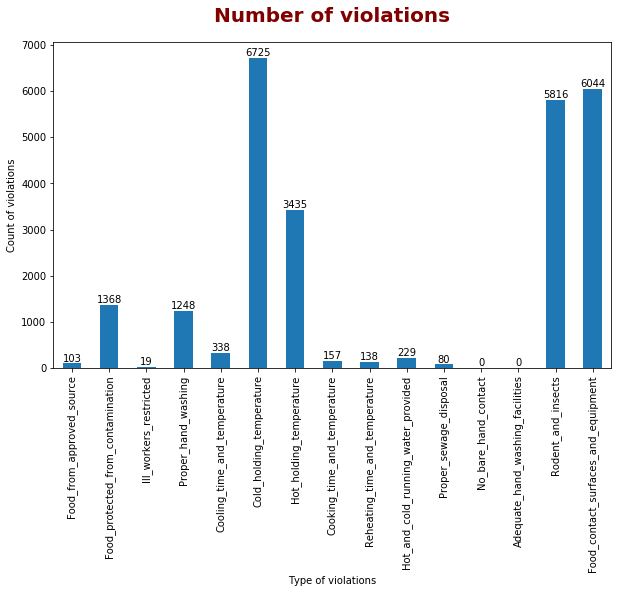

In [78]:
# Return a matplotlib axis object
axis = count_of_violations.plot(kind='bar', y='Count', figsize=(10, 6))
axis.set_xlabel('Type of violations')
axis.set_ylabel('Count of violations')
axis.set_title('Number of violations', fontdict={'fontsize': 20, 'fontweight': 700, 'color': 'maroon'}, pad=20)

for p in axis.patches:
    height = p.get_height()
    axis.annotate('{}'.format(height),xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

We can clearly observe that the number of violations is maximum for the category Cold Holding Temperature as we had observed before. 

We will now try to visualize the trends of restaurant violations over time by using a line graph. 

In [102]:
# At times we will use an aggregated dataset that is not grouped by Group, but by Candy
violations = food_inspection[food_inspection['Any_violations'] == 1]
percent_violations_year = (violations.groupby('Inspection_Year')['Establishment_id'].count()/len(violations))*100
percent_violations_month = (violations.groupby('Inspection_Month')['Establishment_id'].count()/len(violations))*100

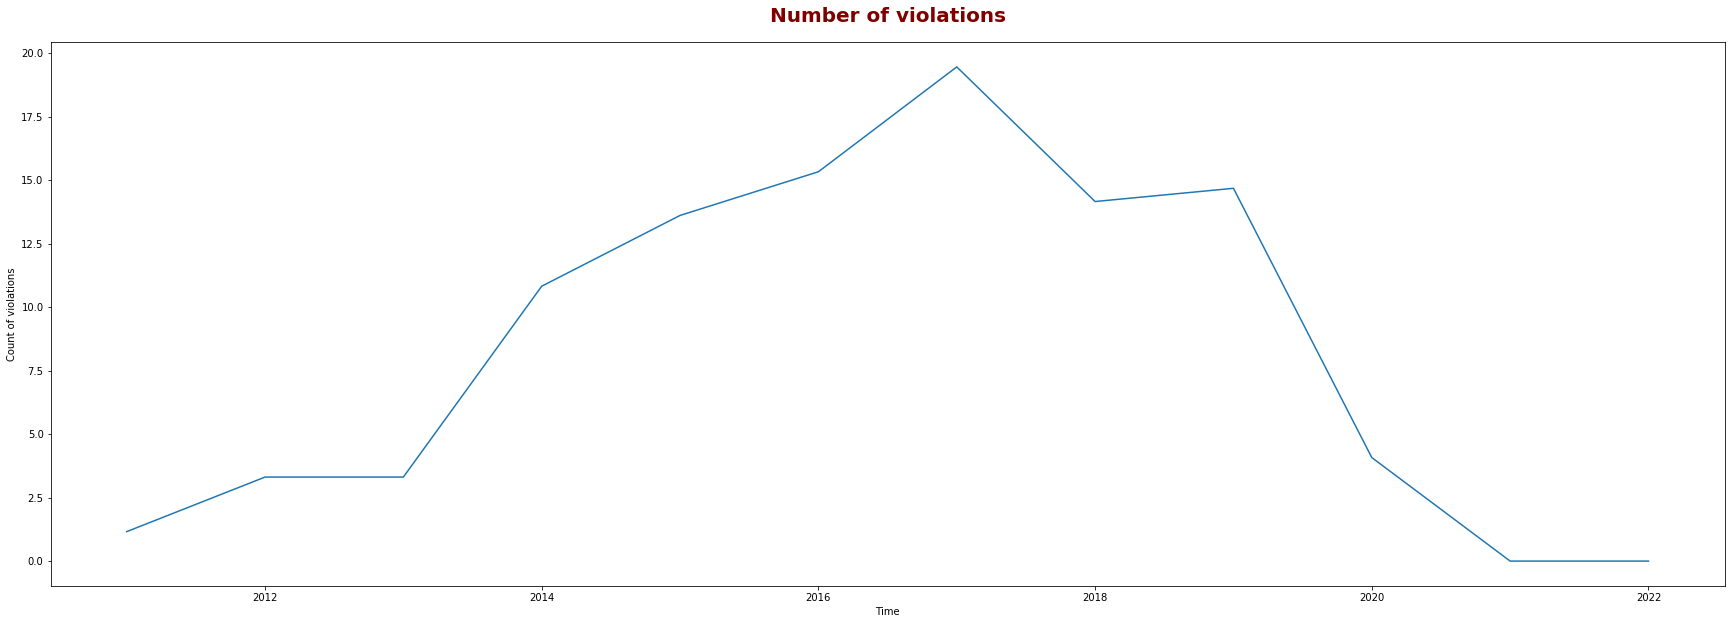

In [103]:
#plotting violations by year
axis = percent_violations_year.plot(kind='line', figsize=(30, 10))
axis.set_xlabel('Time')
axis.set_ylabel('Count of violations')
axis.set_title('Number of violations', fontdict={'fontsize': 20, 'fontweight': 700, 'color': 'maroon'}, pad=20)

for p in axis.patches:
    height = p.get_height()
    axis.annotate('{}'.format(height),xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

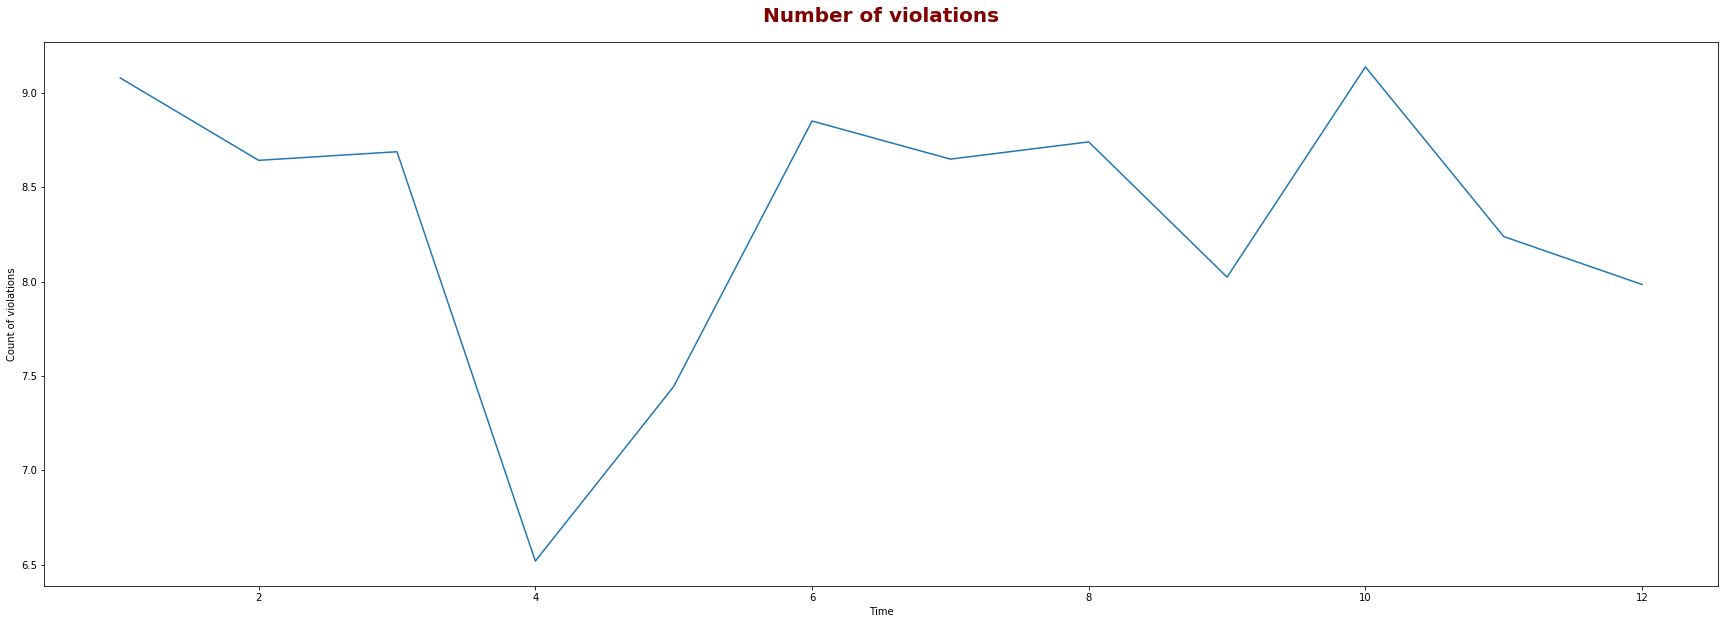

In [104]:
#plotting violations by month
axis = percent_violations_month.plot(kind='line', figsize=(30, 10))
axis.set_xlabel('Time')
axis.set_ylabel('Count of violations')
axis.set_title('Number of violations', fontdict={'fontsize': 20, 'fontweight': 700, 'color': 'maroon'}, pad=20)

for p in axis.patches:
    height = p.get_height()
    axis.annotate('{}'.format(height),xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

#### *From the above two graphs we can see that the number of violations drastically increased till 2017, but have started dropping ever since. This may mean that inspections are getting easier now. But it may also mean that after the heardening of inspections till 2017 , restaurants started complying with health standards and so there are less number of violations over time.*
#### *We can also see the dip in number of violations in the month of April. This is the end of the financial year and restaurants must be more careful with health violations to avoid any problems.*

We will now try to observe the number of violations and types of violations using Maps. We will use maps to try to figure out if there is any correlation between the location of a establishment and number of violations. Maybe there is a location which has more number of violations. Using maps we will be able to get an insight into that

In [235]:
#extracting the latitude and longitude into different columns
food_inspection['latlong'] = food_inspection['Location'].str.replace("POINT ","")

In [236]:
food_inspection['latlong'] = food_inspection['latlong'].str.strip("(")

In [237]:
food_inspection['latlong'] = food_inspection['latlong'].str.strip(")")

In [238]:
food_inspection['latlong']=food_inspection['latlong'].str.split()

In [239]:
food_inspection['Longitude'] = food_inspection['latlong'].str[0]
food_inspection['Latitude'] = food_inspection['latlong'].str[1]
food_inspection

Establishment_id                           Name  \
0                   952  MARTINI'S RESTAURANT & LOUNGE   
1                  2036                      MCDONALDS   
2                  1450                         SUBWAY   
3                  1633                  VOCELLI PIZZA   
4                  1460                         SUBWAY   
...                 ...                            ...   
34731              1967   J&J INTERNATIONAL FOOD STORE   
34732              1712           BOWLERO COLLEGE PARK   
34733              1163                   POLLO FIESTA   
34734              2247            SEVEN ELEVEN 11663B   
34735                71                  METRO TANDOOR   

                         Category Inspection_date  \
0                      Night Club      2020-03-19   
1               Fast Food - Chain      2019-02-14   
2               Fast Food - Chain      2020-03-20   
3               Fast Food - Chain      2020-03-19   
4               Fast Food - Chain      2019-10-30   
...                           ...             ...   
34731               Grocery Store      2019-08-16   
34732  Snack Bar/Concession Stand      2019-08-16   
34733                Full Service      2019-08-21   
34734           Convenience Store      2019-08-19   
34735                         NaN      2019-08-20   

                        Inspection_results             City State      Zip  \
0      Non-Compliant - Violations Observed  FORT WASHINGTON    MD  20744.0   
1        Compliance Schedule - Outstanding  CAPITOL HEIGHTS    MD  20743.0   
2             Critical Violations observed    MITCHELLVILLE    MD  20716.0   
3      Non-Compliant - Violations Observed            BOWIE    MD  20720.0   
4        Compliance Schedule - Outstanding  CAPITOL HEIGHTS    MD  20743.0   
...                                    ...              ...   ...      ...   
34731  Non-Compliant - Violations Observed  LANHAM-SEABROOK    MD  20706.0   
34732                               ------     COLLEGE PARK    MD  20740.0   
34733         Critical Violations observed        RIVERDALE    MD  20737.0   
34734         Critical Violations observed    MOUNT RAINIER    MD  20712.0   
34735           Compliant - No Health Risk   NEW CARROLLTON    MD  20784.0   

                       Address_line_1 Address_line_2  ...  Zip Codes  \
0                         725 CADY DR         ------  ...    15572.0   
1      6131 MARTIN LUTHER KING JR HWY         ------  ...    15568.0   
2                      1344 CRAIN HWY         ------  ...    16438.0   
3                  4861 GLENN DALE RD         ------  ...    16440.0   
4                     9141 ALAKING CT            109  ...    15568.0   
...                               ...            ...  ...        ...   
34731           9456 LANHAM SEVERN RD              A  ...    15994.0   
34732              9021 BALTIMORE AVE         ------  ...    15305.0   
34733             6408 KENILWORTH AVE         ------  ...    15302.0   
34734                  2310 VARNUM ST         ------  ...    16003.0   
34735               8500 ANNAPOLIS RD              E  ...    10891.0   

       Restaurant_list  Inspection_Year  Inspection_Month  \
0                    0             2020                 3   
1                    1             2019                 2   
2                    1             2020                 3   
3                    1             2020                 3   
4                    1             2019                10   
...                ...              ...               ...   
34731                0             2019                 8   
34732                0             2019                 8   
34733                0             2019                 8   
34734                0             2019                 8   
34735                0             2019                 8   

       Inspection_Year_Month  Total_violations  Any_violations  \
0                    2020-03                 0               0   
1     

In [241]:
#filtering out restaurants which have atleast 1 violations
mapbox_access_token = 'pk.eyJ1Ijoia3JpdGlrYXBhbmppYXIiLCJhIjoiY2s5aG5iZ2lrMHBycjNsbGlkbHdkYjJ0OCJ9.X8gn-va2f5dt7oGU3x7FxA'
restaurants_df = food_inspection[food_inspection['Restaurant_list']==1]
restaurants_df = food_inspection[food_inspection['Any_violations']==1]
restaurants_df.head()

Establishment_id              Name           Category Inspection_date  \
1              2036         MCDONALDS  Fast Food - Chain      2019-02-14   
2              1450            SUBWAY  Fast Food - Chain      2020-03-20   
3              1633     VOCELLI PIZZA  Fast Food - Chain      2020-03-19   
5              2688  LAUREL FOOD MART  Convenience Store      2020-03-20   
7              2383         WING ZONE  Fast Food - Chain      2020-03-19   

                    Inspection_results             City State      Zip  \
1    Compliance Schedule - Outstanding  CAPITOL HEIGHTS    MD  20743.0   
2         Critical Violations observed    MITCHELLVILLE    MD  20716.0   
3  Non-Compliant - Violations Observed            BOWIE    MD  20720.0   
5  Non-Compliant - Violations Observed           LAUREL    MD  20707.0   
7  Non-Compliant - Violations Observed            BOWIE    MD  20720.0   

                   Address_line_1 Address_line_2  ...  Zip Codes  \
1  6131 MARTIN LUTHER KING JR HWY         ------  ...    15568.0   
2                  1344 CRAIN HWY         ------  ...    16438.0   
3              4861 GLENN DALE RD         ------  ...    16440.0   
5               9107 MARSHALL AVE         ------  ...    15996.0   
7             6131 HIGH BRIDGE RD         ------  ...    16440.0   

   Restaurant_list  Inspection_Year  Inspection_Month  Inspection_Year_Month  \
1                1             2019                 2                2019-02   
2                1             2020                 3                2020-03   
3                1             2020                 3                2020-03   
5                0             2020                 3                2020-03   
7                1             2020                 3                2020-03   

   Total_violations  Any_violations                  latlong   Longitude  \
1                 1               1   [-76.90064, 38.901794]   -76.90064   
2                 1               1   [-76.71815, 38.908236]   -76.71815   
3                 1               1  [-76.812885, 38.954462]  -76.812885   
5                 1               1  [-76.848522, 39.095288]  -76.848522   
7                 1               1  [-76.773065, 38.974019]  -76.773065   

    Latitude  
1  38.901794  
2  38.908236  
3  38.954462  
5  39.095288  
7  38.974019  

[5 rows x 39 columns]

In [243]:
restaurant_map_data = go.Scattermapbox(
        lon = restaurants_df['Longitude'],
        lat = restaurants_df['Latitude'],
        text = restaurants_df['Name'],
        hoverinfo='text',
        mode = 'markers',
        marker = dict(
                    color = 'red',
                    symbol = 'circle',
                    opacity = .5
                )
)

restaurant_map_layout = go.Layout(
        title = 'Restaurant violations by Restaurant',
        mapbox=go.layout.Mapbox(
            accesstoken=mapbox_access_token,
            zoom=1
        )
    )

class_map = go.Figure(data=restaurant_map_data, layout=restaurant_map_layout)
class_map.show()

In [244]:
restaurant_map_data = go.Scattermapbox(
        lon = restaurants_df['Longitude'],
        lat = restaurants_df['Latitude'],
        text = restaurants_df['Inspection_type'],
        mode = 'markers',
        marker = dict(
                    color = 'blue',
                    symbol = 'circle',
                    opacity = .5
                )
)

restaurant_map_layout = go.Layout(
        title = 'Restaurant violations by Type',
        mapbox=go.layout.Mapbox(
            accesstoken=mapbox_access_token,
            zoom=1
        )
    )

class_map = go.Figure(data=restaurant_map_data, layout=restaurant_map_layout)
class_map.show()

### *We can observe from the above two graphs that there are more violations in areas very close to DC. As the distance increase from DC the number of violations decrease.*